##  WASTE CLASSIFICATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
train_path = "C:/Users/mohan/OneDrive/Desktop/waste management/DATASET/TRAIN"
test_path = "C:/Users/mohan/OneDrive/Desktop/waste management/DATASET/TEST"

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [4]:
x_data = []
y_data = []
for category in glob(train_path + '/*'):
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})
data.shape        

100%|██████████| 9999/9999 [00:10<00:00, 930.41it/s] 


(22564, 2)

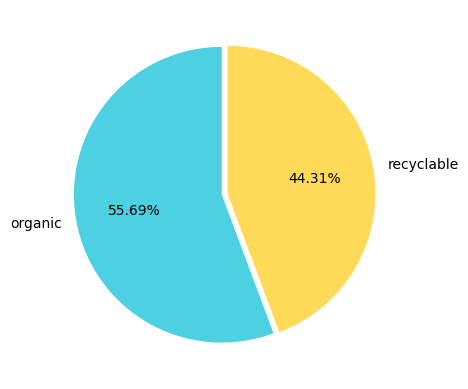

In [5]:
colors = ['#4dd0e1', '#ffda58']
plt.pie(data.label.value_counts(), labels = ['organic','recyclable'], autopct='%0.2f%%',colors = colors, startangle=90, explode=[0.02,0.02])
plt.show()

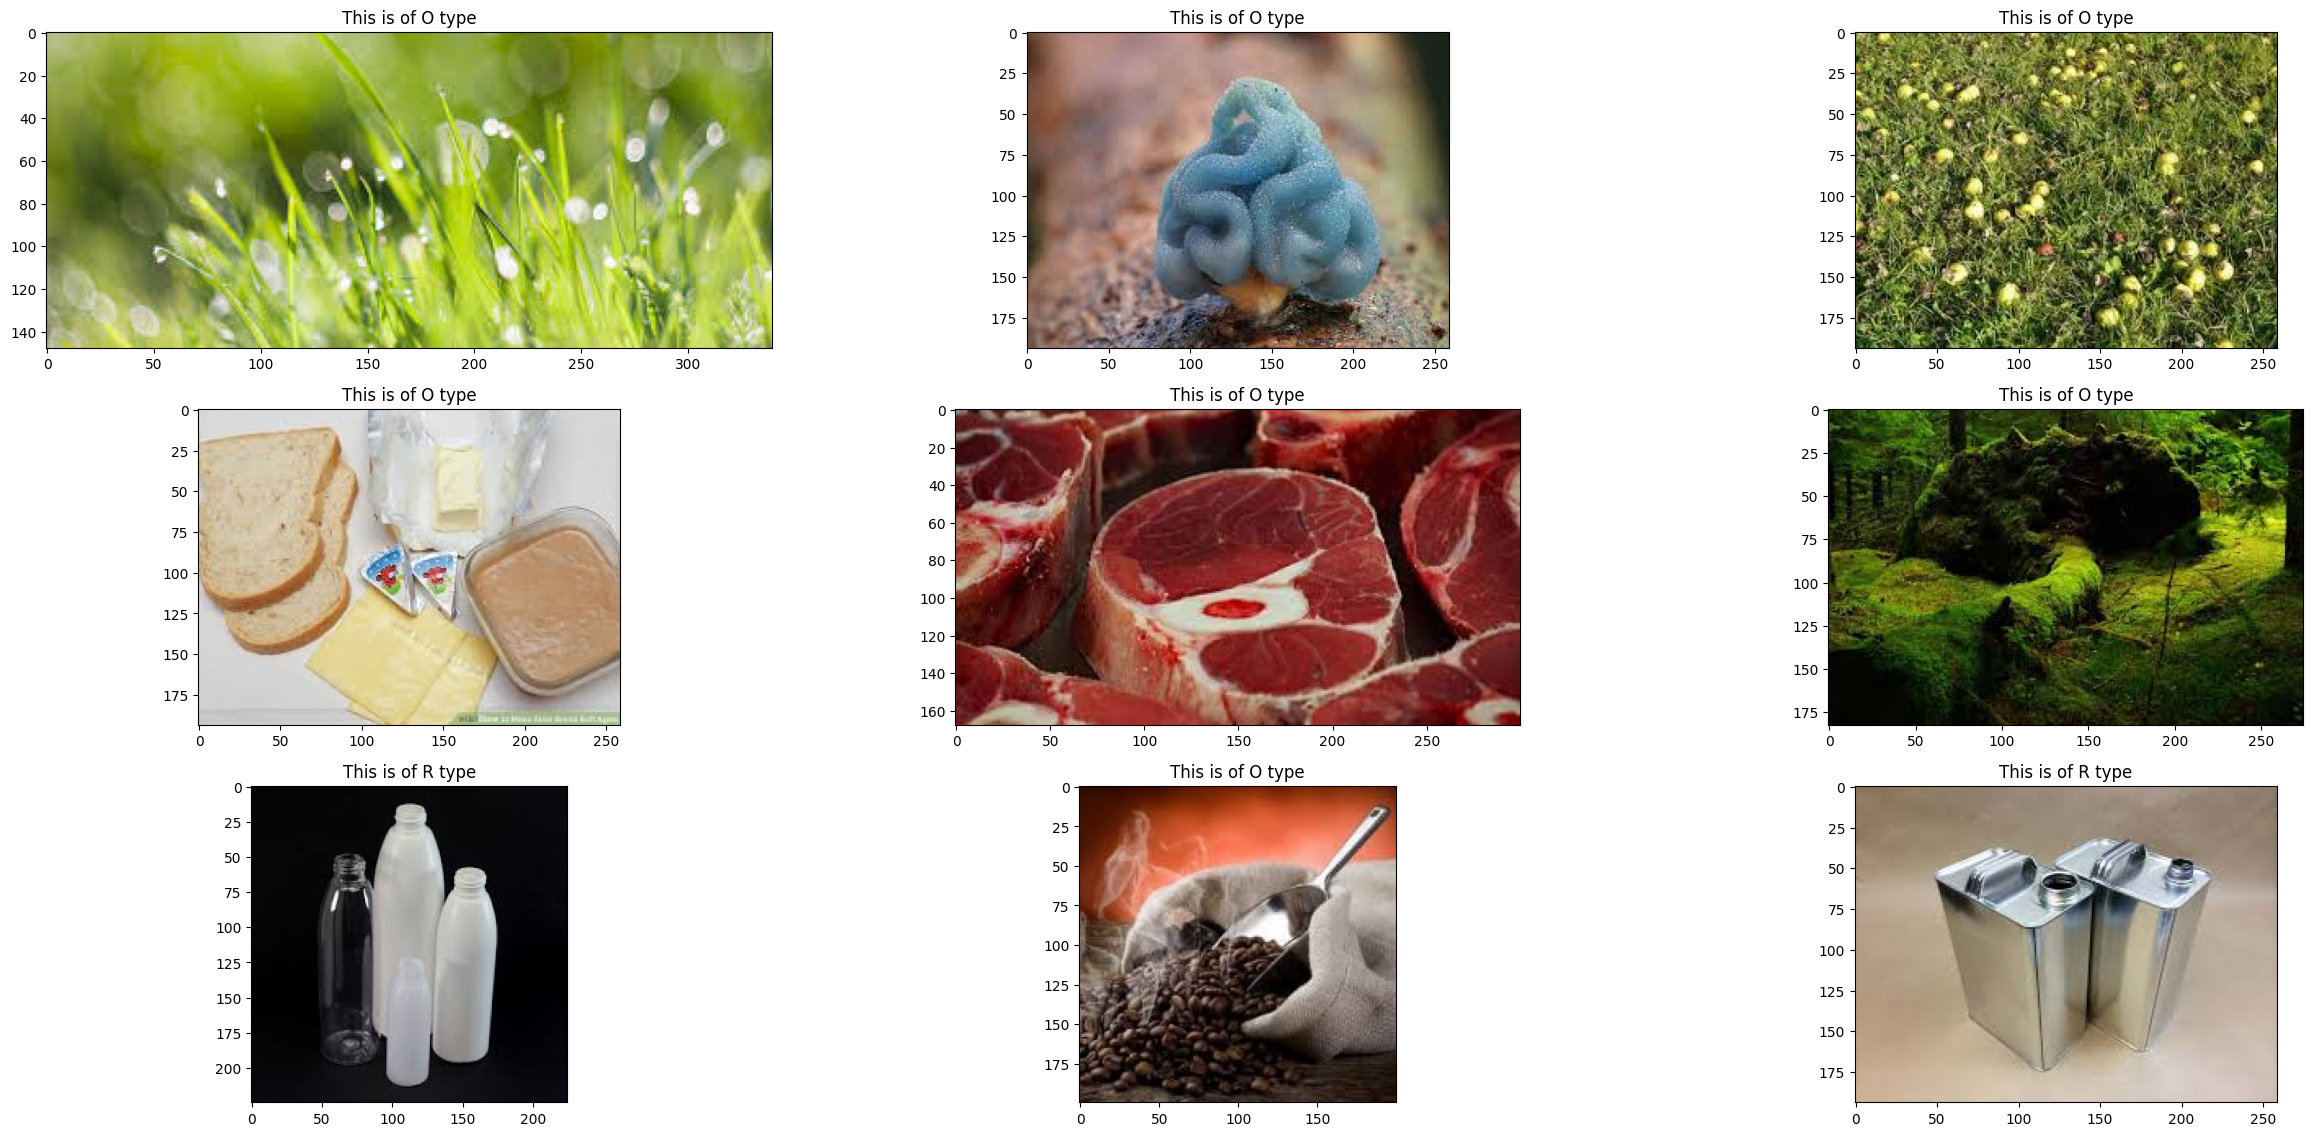

In [17]:
plt.figure(figsize=(25,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index= np.random.randint(15000)
    plt.title('This is of {0} type'.format(os.path.basename(data.label[index])))
    plt.imshow(data.image[index])
    plt.tight_layout()


### CNN - CONVOLUTIONAL NEURAL NETWORK

In [18]:
model= Sequential()
model.add(Conv2D(32,(3,3), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Flatten())


model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
batch_size =64

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_7 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [20]:
train_datagen= ImageDataGenerator(rescale=1./255)
test_datagen= ImageDataGenerator(rescale=1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [22]:
hist=model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
    )

Epoch 1/5
353/353 [==============================] - 1741s 5s/step - loss: 0.4849 - accuracy: 0.7891 - val_loss: 0.3467 - val_accuracy: 0.8838
Epoch 2/5
353/353 [==============================] - 1077s 3s/step - loss: 0.3916 - accuracy: 0.8413 - val_loss: 0.3289 - val_accuracy: 0.8647
Epoch 3/5
353/353 [==============================] - 794s 2s/step - loss: 0.3508 - accuracy: 0.8600 - val_loss: 0.3007 - val_accuracy: 0.8731
Epoch 4/5
353/353 [==============================] - 1212s 3s/step - loss: 0.3283 - accuracy: 0.8696 - val_loss: 0.2354 - val_accuracy: 0.9093
Epoch 5/5
353/353 [==============================] - 1015s 3s/step - loss: 0.2877 - accuracy: 0.8865 - val_loss: 0.2973 - val_accuracy: 0.8703


In [23]:
model.save("model.h5")
